<a href="https://colab.research.google.com/github/sommnathrwategaonkar/Lung-Cancer/blob/main/VGG16%20%2B%20Grad-CAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📥 Upload Train - Normal:


Saving normal_001.png to normal_001.png
Saving normal_002.png to normal_002.png
Saving normal_003.png to normal_003.png
Saving normal_004.png to normal_004.png
Saving normal_005.png to normal_005.png
Saving normal_006.png to normal_006.png
Saving normal_007.png to normal_007.png
Saving normal_008.png to normal_008.png
Saving normal_009.png to normal_009.png
Saving normal_010.png to normal_010.png
Saving normal_011.png to normal_011.png
Saving normal_012.png to normal_012.png
Saving normal_013.png to normal_013.png
Saving normal_014.png to normal_014.png
Saving normal_015.png to normal_015.png
Saving normal_016.png to normal_016.png
Saving normal_017.png to normal_017.png
Saving normal_018.png to normal_018.png
Saving normal_019.png to normal_019.png
Saving normal_020.png to normal_020.png
Saving normal_021.png to normal_021.png
Saving normal_022.png to normal_022.png
Saving normal_023.png to normal_023.png
Saving normal_024.png to normal_024.png
Saving normal_025.png to normal_025.png


Saving abnormal_001.png to abnormal_001.png
Saving abnormal_002.png to abnormal_002.png
Saving abnormal_003.png to abnormal_003.png
Saving abnormal_004.png to abnormal_004.png
Saving abnormal_005.png to abnormal_005.png
Saving abnormal_006.png to abnormal_006.png
Saving abnormal_007.png to abnormal_007.png
Saving abnormal_008.png to abnormal_008.png
Saving abnormal_009.png to abnormal_009.png
Saving abnormal_010.png to abnormal_010.png
Saving abnormal_011.png to abnormal_011.png
Saving abnormal_012.png to abnormal_012.png
Saving abnormal_013.png to abnormal_013.png
Saving abnormal_014.png to abnormal_014.png
Saving abnormal_015.png to abnormal_015.png
Saving abnormal_016.png to abnormal_016.png
Saving abnormal_017.png to abnormal_017.png
Saving abnormal_018.png to abnormal_018.png
Saving abnormal_019.png to abnormal_019.png
Saving abnormal_020.png to abnormal_020.png
Saving abnormal_021.png to abnormal_021.png
Saving abnormal_022.png to abnormal_022.png
Saving abnormal_023.png to abnor

Saving normal_001.png to normal_001.png
Saving normal_002.png to normal_002.png
Saving normal_003.png to normal_003.png
Saving normal_004.png to normal_004.png
Saving normal_005.png to normal_005.png
Saving normal_006.png to normal_006.png
Saving normal_007.png to normal_007.png
Saving normal_008.png to normal_008.png
Saving normal_009.png to normal_009.png
Saving normal_010.png to normal_010.png
Saving normal_011.png to normal_011.png
Saving normal_012.png to normal_012.png
Saving normal_013.png to normal_013.png
Saving normal_014.png to normal_014.png
Saving normal_015.png to normal_015.png
Saving normal_016.png to normal_016.png
Saving normal_017.png to normal_017.png
Saving normal_018.png to normal_018.png
Saving normal_019.png to normal_019.png
Saving normal_020.png to normal_020.png
Saving normal_021.png to normal_021.png
Saving normal_022.png to normal_022.png
Saving normal_023.png to normal_023.png
Saving normal_024.png to normal_024.png
Saving normal_025.png to normal_025.png


Saving abnormal_001.png to abnormal_001.png
Saving abnormal_002.png to abnormal_002.png
Saving abnormal_003.png to abnormal_003.png
Saving abnormal_004.png to abnormal_004.png
Saving abnormal_005.png to abnormal_005.png
Saving abnormal_006.png to abnormal_006.png
Saving abnormal_007.png to abnormal_007.png
Saving abnormal_008.png to abnormal_008.png
Saving abnormal_009.png to abnormal_009.png
Saving abnormal_010.png to abnormal_010.png
Saving abnormal_011.png to abnormal_011.png
Saving abnormal_012.png to abnormal_012.png
Saving abnormal_013.png to abnormal_013.png
Saving abnormal_014.png to abnormal_014.png
Saving abnormal_015.png to abnormal_015.png
Saving abnormal_016.png to abnormal_016.png
Saving abnormal_017.png to abnormal_017.png
Saving abnormal_018.png to abnormal_018.png
Saving abnormal_019.png to abnormal_019.png
Saving abnormal_020.png to abnormal_020.png
Saving abnormal_021.png to abnormal_021.png
Saving abnormal_022.png to abnormal_022.png
Saving abnormal_023.png to abnor

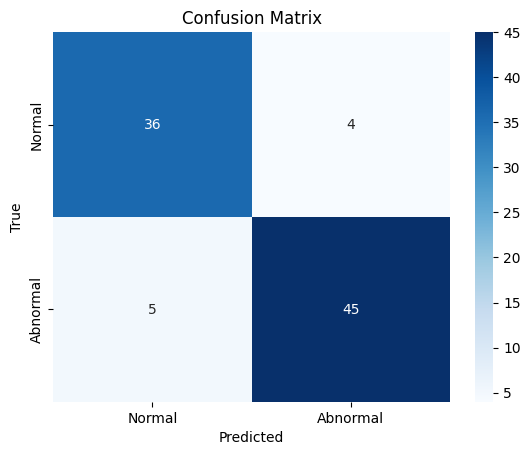

📸 Upload test image for Grad-CAM visualization:


Saving abnormal_001.png to abnormal_001.png
Saving abnormal_002.png to abnormal_002.png
Saving abnormal_003.png to abnormal_003.png
Saving normal_001.png to normal_001.png
Saving normal_002.png to normal_002.png
Saving normal_003.png to normal_003.png
Saving normal_004.png to normal_004.png
Saving normal_005.png to normal_005.png
Saving normal_006.png to normal_006.png
Saving normal_007.png to normal_007.png
Saving normal_008.png to normal_008.png
Saving normal_009.png to normal_009.png


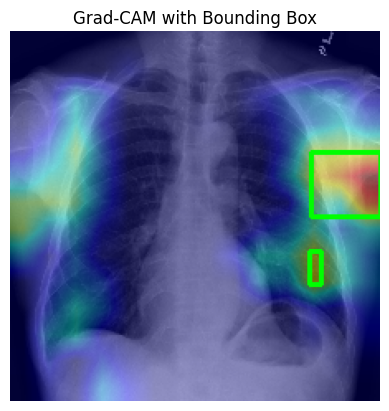

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# ✅ 1. Import Required Libraries
import os, shutil, numpy as np, cv2, matplotlib.pyplot as plt, seaborn as sns, warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
from PIL import Image

# ✅ 2. Create Dataset Folders
base_dir = "/content/lung_data"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

for d in [train_dir, val_dir]:
    for cls in ['Normal', 'Abnormal']:
        os.makedirs(os.path.join(d, cls), exist_ok=True)

# ✅ 3. Upload Images into Respective Folders
print("📥 Upload Train - Normal:")
for f in files.upload().keys():
    shutil.move(f, os.path.join(train_dir, 'Normal', f))

print("📥 Upload Train - Abnormal:")
for f in files.upload().keys():
    shutil.move(f, os.path.join(train_dir, 'Abnormal', f))

print("📥 Upload Val - Normal:")
for f in files.upload().keys():
    shutil.move(f, os.path.join(val_dir, 'Normal', f))

print("📥 Upload Val - Abnormal:")
for f in files.upload().keys():
    shutil.move(f, os.path.join(val_dir, 'Abnormal', f))

# ✅ 4. Data Generators
img_size = (224, 224)
batch_size = 8

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
).flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='binary', shuffle=False)

# ✅ 5. Build Model with Clean Input Layer
def build_model():
    inputs = Input(shape=(224, 224, 3))
    base = VGG16(include_top=False, weights='imagenet', input_tensor=inputs)
    base.trainable = False
    x = GlobalAveragePooling2D()(base.output)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(1, activation='sigmoid')(x)
    return Model(inputs, output)

model = build_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ 6. Train the Model
history = model.fit(train_gen, validation_data=val_gen, epochs=25)

# ✅ 7. Evaluate Model
val_gen.reset()
preds = model.predict(val_gen)
y_pred = (preds > 0.5).astype(int).reshape(-1)
y_true = val_gen.classes

# ✅ 8. Classification Metrics
print("📊 Classification Report:")
report = classification_report(y_true, y_pred, target_names=["Normal", "Abnormal"], output_dict=True)
for cls in ["Normal", "Abnormal"]:
    print(f"{cls} - Precision: {report[cls]['precision']:.2f}, Recall: {report[cls]['recall']:.2f}, F1: {report[cls]['f1-score']:.2f}")

# ✅ 9. Confusion Matrix with TP, FP, FN, TN
cm = confusion_matrix(y_true, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print("\n📌 Confusion Matrix:")
print(f"[[TN={TN}  FP={FP}]\n [FN={FN}  TP={TP}]]")

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ✅ 10. Grad-CAM Utilities
def make_gradcam_heatmap(img_array, model, last_conv_layer="block5_conv3"):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer).output, model.output])
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        loss = predictions[:, 0]
    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = np.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def show_gradcam(original_img, heatmap, output_path="gradcam_output.jpg"):
    heatmap_resized = cv2.resize(heatmap, original_img.size)
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    original_cv = cv2.cvtColor(np.array(original_img), cv2.COLOR_RGB2BGR)
    overlay = cv2.addWeighted(original_cv, 0.6, heatmap_color, 0.4, 0)

    _, thresh = cv2.threshold(heatmap_uint8, 150, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(overlay, (x, y), (x+w, y+h), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM with Bounding Box")
    plt.axis("off")
    plt.show()

    cv2.imwrite(output_path, overlay)
    files.download(output_path)

# ✅ 11. Upload Test Image and Apply Grad-CAM
print("📸 Upload test image for Grad-CAM visualization:")
test_image = files.upload()
test_path = list(test_image.keys())[0]
original_img = load_img(test_path, target_size=img_size)
img_array = preprocess_input(np.expand_dims(img_to_array(original_img), axis=0))
heatmap = make_gradcam_heatmap(img_array, model)
show_gradcam(original_img, heatmap)
